In [42]:
%matplotlib widget
# %matplotlib notebook doesn't work on vscode

import matplotlib.pyplot as plt
import numpy as np 
from numba import jit
from numpy import sin, pi
from pathlib import Path

%reload_ext autoreload
%aimport Funcs
%aimport visualization
%aimport species_transport
%aimport parameters
from parameters import *
from fluid_flow import dt_fluid_flow
from species_transport import set_BCs, set_Temp_BC, evolve_species

In [43]:
N = 50
dx, dy, Ns_c, Nc_lw = parameters.set_resolution(N,M)
dt = dt_fluid_flow(dx, Fo=0.3)

In [44]:
# load the velocity field:
datap = Path('data/vel_field/test0') / 'UVP_N{}.npy'.format(N)
u,v,_ = np.load(datap)

In [45]:
# initial setup of the species distribution
CH4, O2, N2, H2O, CO2, T = np.zeros((6,N,M))
O2[:] = .233
N2[:] = .767
T[:] = 300
Y = np.array([CH4, O2, N2, CO2, H2O])

In [46]:
Nt = int(1000 * 3.2e-5 / dt)
%time Y, T = evolve_species(Nt, Y, T, dt, u, v, dx, dy, Ns_c, Nc_lw, chem=False, evolve_T=False)

CPU times: user 680 ms, sys: 0 ns, total: 680 ms
Wall time: 677 ms


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
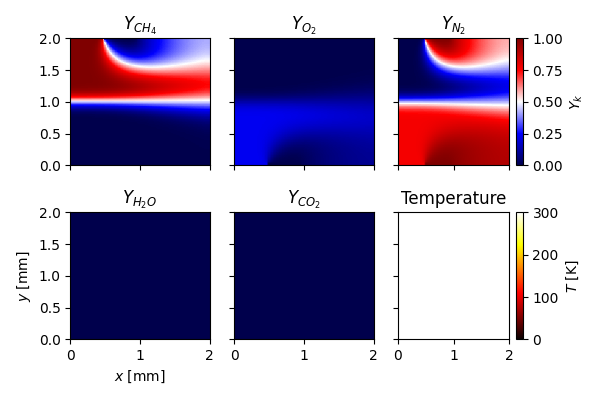

In [54]:
from visualization import plot_species_overview
%autoreload 1
fig, axs = plt.subplots(2, 3, figsize=(6,4.),sharex=True, sharey=True)
plot_species_overview(Y,T, axs=axs)
plt.tight_layout()

Figure for the presentation:

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
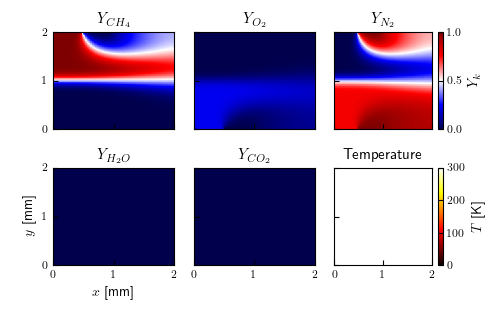

In [58]:
from visualization import plot_species_overview
%autoreload 1
if False:
    from plotting import set_size
    plt.style.use('tex.mplstyle')
    figsize = set_size(fraction=0.8, aspect_r=0.5)
    
    fig, axs = plt.subplots(2, 3, figsize=figsize,sharex=True, sharey=True)
    plot_species_overview(Y,T, axs=axs)
    
    #fig.savefig('figures/pre-combustion_overview.svg')
    plt.style.use('default')


In [15]:
"""
data_sp = Path('data/species') / 'N{}M{}.npy'.format(N,M)
species_data = np.zeros((Y.shape[0] + 1, *Y.shape[1:]))
species_data[:-1,:, :] = Y
species_data[-1, :, :] = T
np.save(data_sp, species_data)
"""

"\ndata_sp = Path('data/species') / 'N{}M{}.npy'.format(N,M)\nspecies_data = np.zeros((Y.shape[0] + 1, *Y.shape[1:]))\nspecies_data[:-1,:, :] = Y\nspecies_data[-1, :, :] = T\nnp.save(data_sp, species_data)\n"

## What is the diffusion zone length?

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
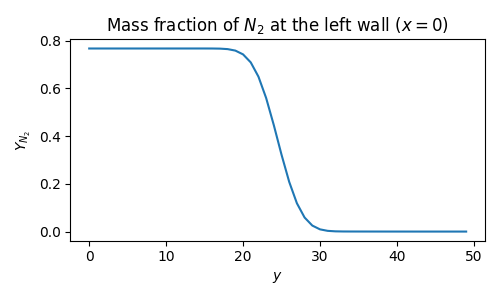

In [16]:
left_wall_N2 = Y[2,0,:]
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(left_wall_N2)
ax.set_xlabel('$y$')
ax.set_ylabel('$Y_{N_2}$')
ax.set_title('Mass fraction of $N_2$ at the left wall ($x=0$)')
plt.tight_layout()